In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torch


In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

print(device)

##현재 데이터는 directory_path에 0~9까지의 숫자가 각가 10개씩 저장되어 있다.
##이를 label, 이미지로 저장해보도록 하겠다.


cuda


In [44]:
directory_path = r'C:\\Users\\kuroc\\Documents\\no_1\\num data\\train'

# 데이터셋 초기화; 이미지:라벨로 저장
data = {'images': [], 'labels': []}

# 디렉토리 내의 모든 파일 목록 얻기
file_list = os.listdir(directory_path)

print(len(file_list))

##문제 없이 파일 출력 완료


510


In [45]:
# 디렉토리 내의 각 이미지에 대해 반복
for file_name in file_list:
    img_path = os.path.join(directory_path, file_name)
    img_array=np.fromfile(img_path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # 이미지를 읽어오기
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # 이미지 파일 이름에서 숫자 정보 추출
    ''' 이미지 형식은 "해당 숫자_순번"형식이다. 따라서 _를 기준으로 숫자를 분리한다.
        앞 숫자가 label이다. 글자로 취급되기 때문에 이를 int형으로 바꾼다 '''
    
    label = int(file_name.split('_')[0])

    # 이미지와 레이블을 데이터셋에 추가
    data['images'].append(img)
    data['labels'].append(label)

Images shape: (510, 28, 28)
Labels shape: (510,)


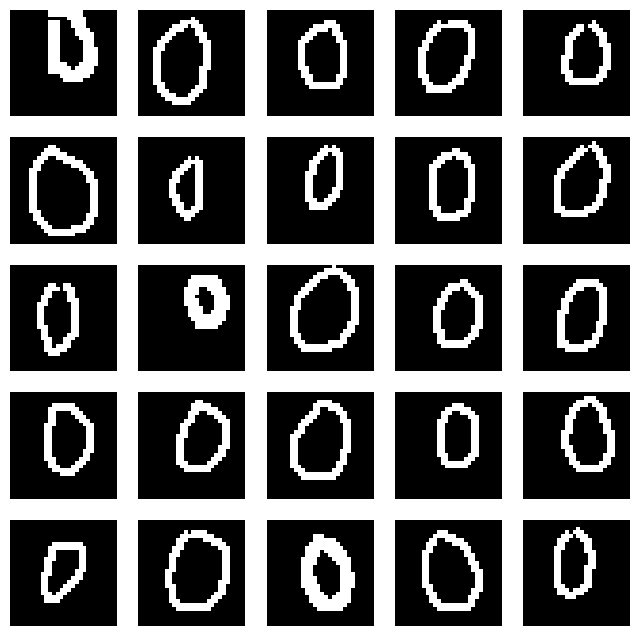

In [46]:
# NumPy 배열로 변환
data['images'] = np.array(data['images'])
data['labels'] = np.array(data['labels'])

## image는 이미 0, 255 형태로 전처리 되어 있다.
## x_train, y_train을 만들기 위해 array형식으로 바꿔준다.

# 데이터셋의 형태 확인
print("Images shape:", data['images'].shape)
print("Labels shape:", data['labels'].shape)

##이미지도, 라벨도 100개가 잘 저장 된 것을 볼 수 있다.

plt.figure(figsize=(8, 8))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(data['images'][i], 'gray')
    plt.axis('off')
plt.show()

##이미지가 잘 저장되었다.

In [47]:
directory_te = r'C:\Users\kuroc\Documents\no_1\num data\test'

# 데이터셋 초기화; 이미지:라벨로 저장
data2 = {'images': [], 'labels': []}

# 디렉토리 내의 모든 파일 목록 얻기
file_list = os.listdir(directory_te)

print(file_list)

# 디렉토리 내의 각 이미지에 대해 반복
for i, file_name in enumerate(file_list):
    img_path = os.path.join(directory_te, file_name)

    # 이미지를 흑백으로 읽어오기
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
    # 이미지 파일 이름에서 숫자 정보 추출
    label = int(file_name.split('.')[0])

    # 이미지와 레이블을 데이터셋에 추가
    data2['images'].append(img)
    data2['labels'].append(label)


['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


In [48]:
directory_te = r'C:\Users\kuroc\Documents\no_1\num data\test'

# 데이터셋 초기화; 이미지:라벨로 저장
data2 = {'images': [], 'labels': []}

# 디렉토리 내의 모든 파일 목록 얻기
file_list = os.listdir(directory_te)

print(file_list)

# 디렉토리 내의 각 이미지에 대해 반복
for i, file_name in enumerate(file_list):
    img_path = os.path.join(directory_te, file_name)

    # 이미지를 흑백으로 읽어오기
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
    # 이미지 파일 이름에서 숫자 정보 추출
    label = int(file_name.split('.')[0])

    # 이미지와 레이블을 데이터셋에 추가
    data2['images'].append(img)
    data2['labels'].append(label)


['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


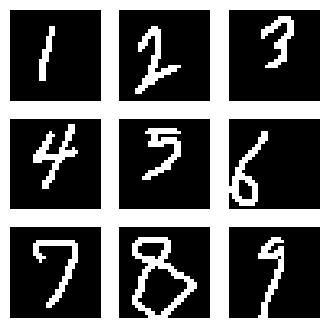

In [49]:
plt.figure(figsize=(4, 4))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(data2['images'][i - 1], 'gray')  # 인덱스는 0부터 시작하므로 i - 1
    plt.axis('off')
plt.show()

In [50]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.linear1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.linear2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.linear3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(3 * 3 * 128, 625)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [51]:
## 데이터 전처리 클래스
class CustomDataset(nn.Module):
    def __init__(self, data, transform=None):
        self.images = data['images']
        self.labels = data['labels']
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Apply the specified transformations to the image
        if self.transform:
            image = self.transform(image)
        image = image.flatten()
        # Convert image and label to PyTorch Tensor
        image = torch.tensor(image, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)

        return image, label

In [52]:
## x 모델 만들기
model=CNN().to(device)
dataset = CustomDataset(data)
testset = CustomDataset(data2)

In [75]:
total = len(dataset)

epoch = 20

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for e in range(epoch):
    total_cost = 0  # 새로운 변수로 변경
    for x, y in dataset:
        x = x.view(-1, 1, 28, 28)
        
        x = x.to(device)
        y = y.to(device)
        y = torch.tensor([y]).to(device)

        optimizer.zero_grad()
        hy = model(x)
        cost = criterion(hy, y)
        
        cost.backward()
        optimizer.step()

        total_cost += cost.item()
    print("cost[{}] :{}".format(e + 1, total_cost / total))

print("학습종료")


cost[1] :0.02986653142618202
cost[2] :0.0010879617611354404
cost[3] :0.00022024060164363958
cost[4] :0.00017533114440177106
cost[5] :0.00014902033713932596
cost[6] :0.00013103345436770534
cost[7] :0.00011762895745490328
cost[8] :0.0001071058964559963
cost[9] :9.85591203945769e-05
cost[10] :9.147499654959263e-05
cost[11] :8.547660297863632e-05
cost[12] :8.029470663446678e-05
cost[13] :7.578513095469317e-05
cost[14] :7.18267766189749e-05
cost[15] :6.830574276001894e-05
cost[16] :6.515130944616292e-05
cost[17] :6.23107293109078e-05
cost[18] :5.9730996108419164e-05
cost[19] :5.737896380207484e-05
cost[20] :5.5219373192212025e-05
학습종료


In [85]:
# 'PATH' 변수 선언
PATH = 'C:\\Users\\kuroc\\Documents\\no_1\\num_data.pth'

# 모델의 상태 사전을 저장
torch.save(model.state_dict(), PATH)


# 정확도
for x, y in testset:
    x = x.view(-1, 1, 28, 28)
    x = x.to(device)
    y = y.to(device)
    
    outputs = model(x)
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == y).sum().item()  # 'labels' 대신 'y'를 사용

accuracy = correct / total
print('Test Accuracy: {:.2%}'.format(accuracy))


Test Accuracy: 18.50%
